In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
warnings.filterwarnings("ignore") 
data = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(data.columns.values)
# Categorical:
# 可分類: Survived, Sex, Embarked
# 可排序： Pclass,
# Numerical:
# 連續： Fare
# 間斷： Age, SibSp, Parch
# Other: 
# 不重複：PassengerId, Name,
# Ticket, Cabin

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
data.info()
# Train data中，Age, Cabin, Embarked 有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()
# Test data中，Age, Cabin, Fare 有缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
data.describe()
# Train data共有891位樣本，而總登船人數為2224人，樣本占總值之40%
# Train data中存活率為0.38，而總登船的2224人中有1502位死亡，母體存活率為0.32，低於樣本存活率
#多數乘客並未和家人同行

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

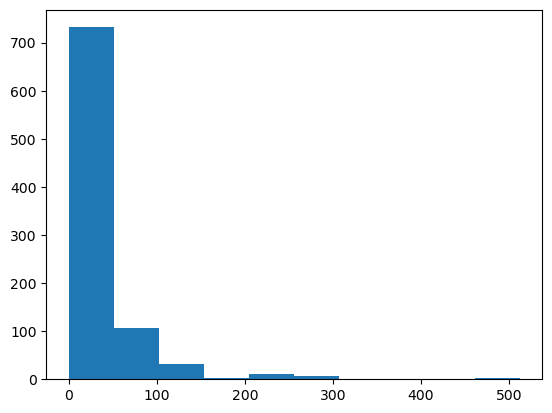

In [7]:
#票價分佈
plt.hist(data['Fare'])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

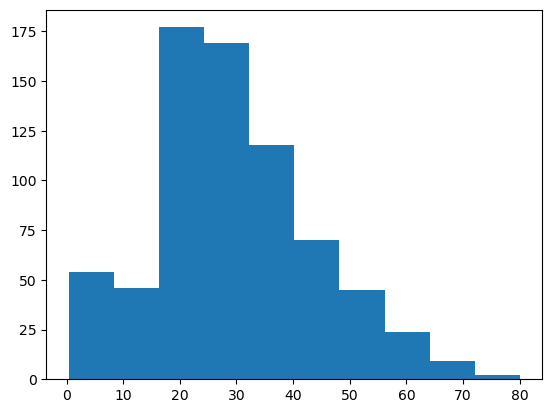

In [8]:
#年齡分佈
plt.hist(data['Age'])

In [9]:
#data.describe()預設只計算數值型統計量，data.describe(include='O')則會計算非數值型之統計量
data.describe(include='O')
#沒有同名同姓的乘客
#男性577人，大於共314人的女性
#有共同購票與共用客艙的情形。共同購票之比例為23%，共用客艙之比例為28%
#多數人自Southampton上船，共計佔樣本的72％

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
# 性別與存活率之關係
print(data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('')
# 階級與存活率之關係
print(data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('')
# 性別、階級與存活率之關係
print(data[['Sex', 'Pclass','Survived']].groupby(['Sex','Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('')
# 旁系血親與存貨率之關係
print(data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('')
# 直系血親與存活率之關係
print(data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('')
# 將旁系與直系血親合併並新增為家族，並觀察家族與存活率之關係
combine = [data,test]
for i in combine:
    i['Family'] = i['SibSp'] + i['Parch']
    
print(data[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('')
# 登船地點與存活率之關係
print(data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))

      Sex  Survived
0  female  0.742038
1    male  0.188908

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

      Sex  Pclass  Survived
0  female       1  0.968085
1  female       2  0.921053
2  female       3  0.500000
3    male       1  0.368852
4    male       2  0.157407
5    male       3  0.135447

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

   Family  Survived
3       3  0.724138
2       2  0.578431
1       1  0.552795
6       6  0.333333
0       0  0.303538
4       4  0.200000
5       5  0.136364
7       7  0.000000
8      10  0.000000

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [11]:
# 1.大部分男生都死了，大部分女生活下來
# 2.階級跟存活率成正比
# 3.最低艙等女性存活率還是比最高艙等男性高
# 4.旁系血親1個存活率最高
# 5.直系血親3個存活率最高
# 6.如果加總，有3個親友存活率高
# 7.船艙存活率C>Q>S
# 8.女性、有3位家人共同搭乘者、階級1，存活率高
data = data.drop(['SibSp','Parch'],axis=1)
test = test.drop(['SibSp','Parch'],axis = 1)
combine = [data,test]

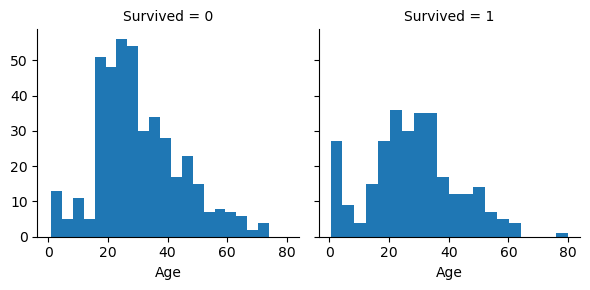

In [12]:
sns.FacetGrid(data,col = 'Survived')\
    .map(plt.hist,'Age',bins=20)
# 嬰兒存活率高
# 青年人未存活率高
# 多數乘客年齡介於青壯年

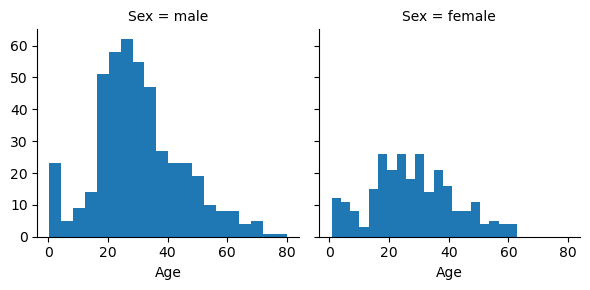

In [13]:
sns.FacetGrid(data,col = 'Sex')\
    .map(plt.hist,'Age',bins=20)
# 青壯年佔男性的多數

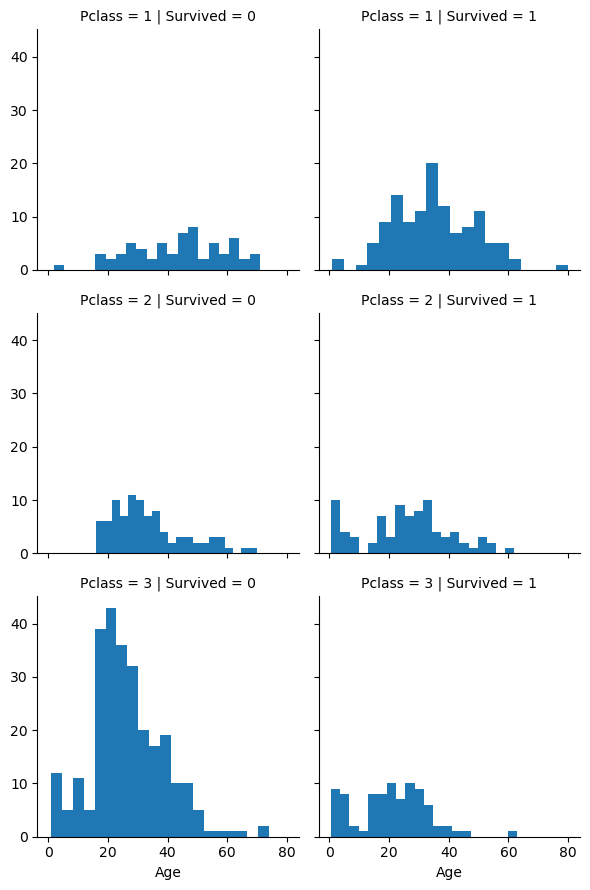

In [14]:
sns.FacetGrid(data, col='Survived', row='Pclass')\
    .map(plt.hist, 'Age',bins=20)
# 階級1存活率最高
# 階級3人數最多，未存活率也最高
# 階級3多為青壯年

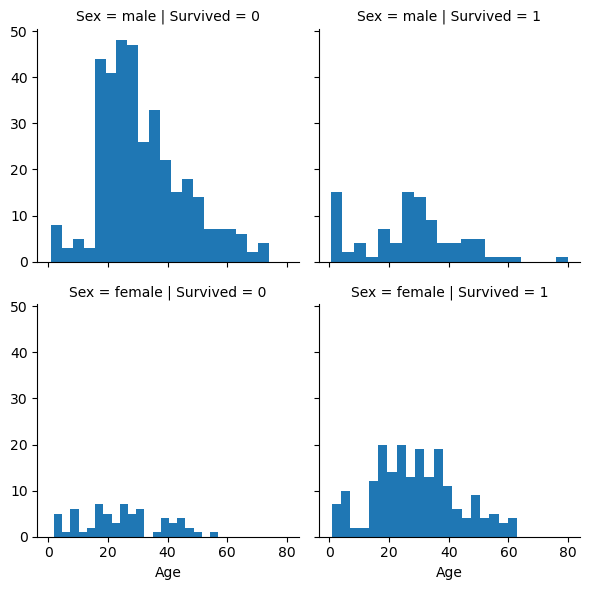

In [15]:
sns.FacetGrid(data, col='Survived', row='Sex')\
    .map(plt.hist, 'Age',bins=20)
# 多數死亡男性為青壯年

In [16]:
# 因共同購票與共用客艙之比例偏高（共同購票之比例為23%，共用客艙之比例為28%）
# 刪除'Ticket', 'Cabin'欄
data = data.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [17]:
data = data.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)

In [18]:
combine = [data,test]
for i in combine:
    i['Sex'] = LabelEncoder().fit_transform(i['Sex'].factorize()[0]) 
data.head(6)
# 第五列之年齡為缺失值

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.0,7.2500,S,1
1,1,1,1,38.0,71.2833,C,1
2,1,3,1,26.0,7.9250,S,0
3,1,1,1,35.0,53.1000,S,1
4,0,3,0,35.0,8.0500,S,0
5,0,3,0,NaN,8.4583,Q,0


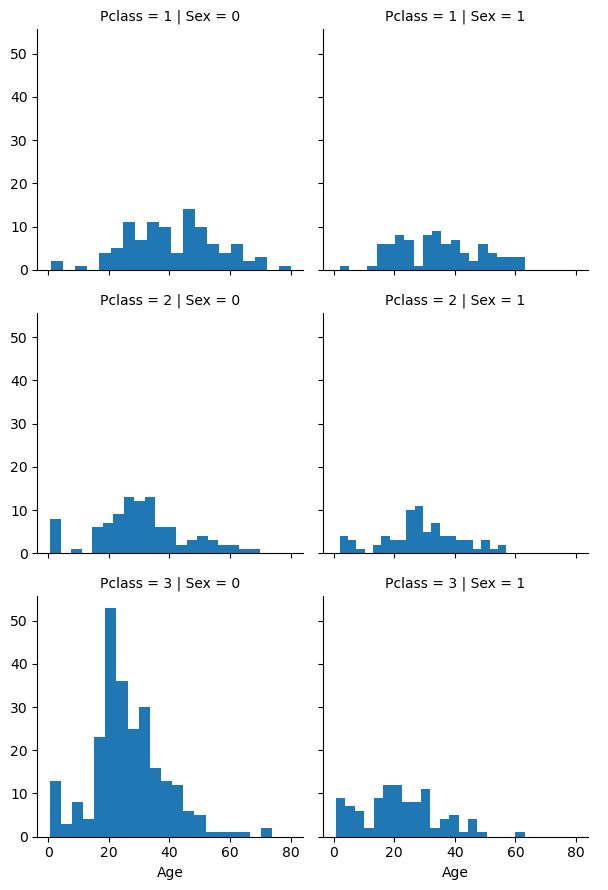

In [19]:
sns.FacetGrid(data, row='Pclass', col='Sex')\
    .map(plt.hist, 'Age', bins=20)\
    .add_legend()

In [20]:
#根據'Pclass','Sex'分類找age的平均值
age_mean = round(data.groupby(['Pclass','Sex']).Age.mean())
age_mean

Pclass  Sex
1       0      41.0
        1      35.0
2       0      31.0
        1      29.0
3       0      27.0
        1      22.0
Name: Age, dtype: float64

In [21]:
combine = [data,test]
for i in combine:
    i.set_index(['Pclass','Sex'],inplace=True) #變更索引
    i.Age.fillna(age_mean,inplace=True) #根據不同'Pclass','Sex'填充缺失值
    i.reset_index(inplace=True) #還原索引
    
data.set_index(['Survived'],inplace=True)
data.reset_index(inplace=True) #重新將Survived移回最前欄
data.head(6)
# 可見第五列之年齡缺失值已補上

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,0,22.0,7.2500,S,1
1,1,1,1,38.0,71.2833,C,1
2,1,3,1,26.0,7.9250,S,0
3,1,1,1,35.0,53.1000,S,1
4,0,3,0,35.0,8.0500,S,0
5,0,3,0,27.0,8.4583,Q,0


In [22]:
# 針對兩筆缺失Embarked之資料，可以採用：
# 方法1:移除Embarked有缺失值的兩列
# data = data.dropna(subset=['Embarked'], how='any')
# 方法2:填充眾數
# 這裡選擇使用方法2，填充最多人上船的S
data['Embarked'].fillna(value='S', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Family    891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [23]:
data['AgeBand'] = pd.cut(data['Age'],5)
data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [24]:
combine = [data,test]
for i in combine:
    i.loc[i['Age'] <=16,'Age'] = 0
    i.loc[(i['Age'] >16) & (i['Age']<=32),'Age'] = 1
    i.loc[(i['Age'] >32) & (i['Age']<=48),'Age'] = 2
    i.loc[(i['Age'] >48) & (i['Age']<=64),'Age'] = 3
    i.loc[(i['Age'] >64),'Age'] = 4

In [25]:
data = data.drop('AgeBand',axis = 1)

In [26]:
test[np.isnan(test['Fare']) == True]

,Pclass,Sex,PassengerId,Age,Fare,Embarked,Family
152,3,0,1044,3.0,NaN,S,0


In [27]:
test[['Embarked','Pclass','Sex', 'Fare']].groupby(['Pclass','Embarked','Sex'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Pclass,Embarked,Sex,Fare
10,3,C,0,10.450626
11,3,C,1,11.360950
12,3,Q,0,8.931483
13,3,Q,1,9.051813
14,3,S,0,12.718872
15,3,S,1,16.825610
5,2,C,0,14.451771
6,2,C,1,30.040625
7,2,Q,0,11.273950
8,2,S,0,21.641827


In [28]:
test.loc[test['PassengerId']==1044,'Fare'] = 12.7188
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Sex          418 non-null    int64  
 2   PassengerId  418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   Family       418 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [29]:
data['FareBand'] = pd.cut(data['Fare'],4)
data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [30]:
combine = [data,test]
for i in combine:
    i.loc[i['Fare'] <=128,'Fare'] = 0
    i.loc[(i['Fare'] >128) & (i['Fare']<=256),'Fare'] = 1
    i.loc[(i['Fare'] >256) & (i['Fare']<=384),'Fare'] = 2
    i.loc[(i['Fare'] >384),'Fare'] = 3
data = data.drop('FareBand',axis=1)

In [31]:
combine = [data,test]
for i in combine:
    i['Embarked'] = LabelEncoder().fit_transform(i['Embarked'].factorize()[0]) 

In [32]:
X_train = data.drop("Survived", axis=1)
Y_train = data["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy() # 為什麼要有copy呢？
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.58

In [34]:
data_corr = pd.DataFrame(data.columns.delete(0)) #為何有delete(0)呢？
data_corr.columns = ['Feature']
data_corr["Correlation"] = pd.Series(logreg.coef_[0])
data_corr.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.627492
4,Embarked,0.227138
3,Fare,0.114480
5,Family,-0.187375
2,Age,-0.639543
0,Pclass,-1.217050


In [35]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

82.49

In [36]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.85

In [37]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.36

In [38]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

77.55

In [39]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

In [40]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.56

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.86

In [42]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.86

In [43]:
# models整理
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.86
8,Decision Tree,85.86
1,KNN,84.85
0,Support Vector Machines,82.49
2,Logistic Regression,80.58
4,Naive Bayes,80.36
7,Linear SVC,80.25
6,Stochastic Gradient Decent,78.56
5,Perceptron,77.55


In [44]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':Y_pred})
filename = 'Titanic Predictions 1.csv'
submission.to_csv(filename,index=False)